# Lineare Modelle & Nicht-Linearität

In [8]:
import pandas as pd
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

Text(0, 0.5, 'Monatliche Transaktionen ($)')

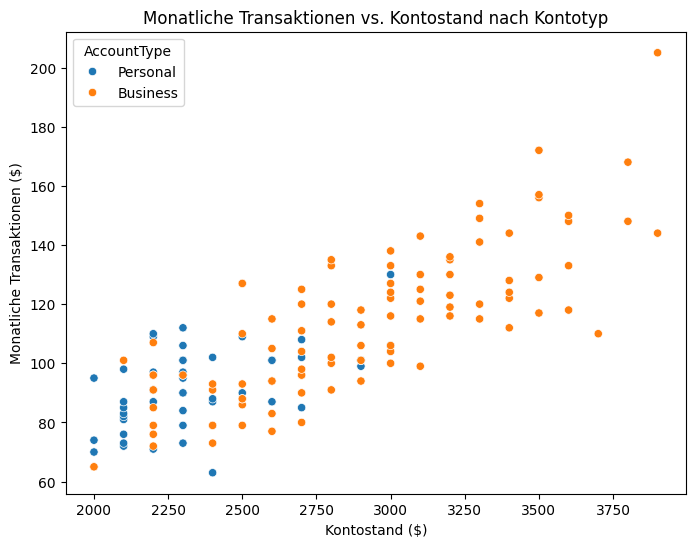

In [9]:
# Load data
account_data = pd.read_csv('Accounts.csv')

# Plot relationships
plt.figure(figsize=(8, 6))
sns.scatterplot(x='AccountBalance', y='MonthlyTransactions', hue='AccountType', data=account_data)
plt.title('Monatliche Transaktionen vs. Kontostand nach Kontotyp')
plt.xlabel('Kontostand ($)')
plt.ylabel('Monatliche Transaktionen ($)')

In [10]:
# Fit models
model_simple = ols('MonthlyTransactions ~ AccountBalance', data=account_data).fit()
model_account_type = ols('MonthlyTransactions ~ AccountBalance + C(AccountType)', data=account_data).fit()
model_interaction = ols('MonthlyTransactions ~ AccountBalance * C(AccountType)', data=account_data).fit()

Text(0.5, 1.0, 'Lineare Regression: Kontostand vs. Monatliche Transaktionen')

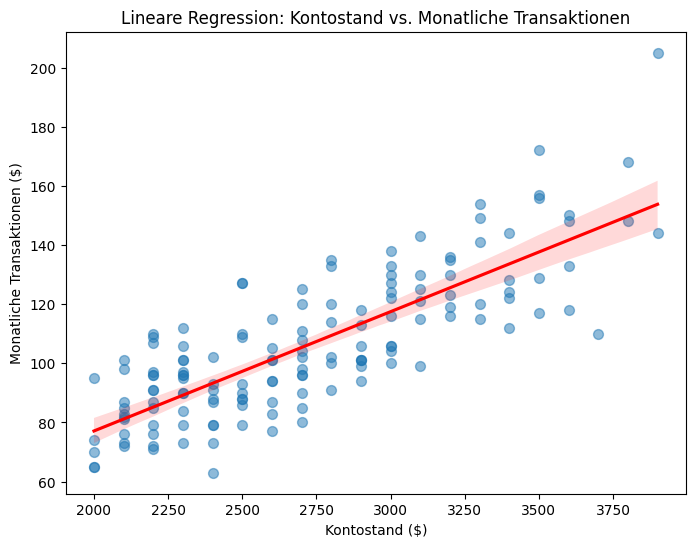

In [11]:
# Plotting the linear regression model
plt.figure(figsize=(8, 6))
sns.regplot(x='AccountBalance', y='MonthlyTransactions', data=account_data, scatter_kws={'s': 50, 'alpha': 0.5}, line_kws={'color': 'red'})
plt.xlabel('Kontostand ($)')
plt.ylabel('Monatliche Transaktionen ($)')
plt.title('Lineare Regression: Kontostand vs. Monatliche Transaktionen')

In [12]:
# Summary of simple model
print(model_simple.summary())

                             OLS Regression Results                            
Dep. Variable:     MonthlyTransactions   R-squared:                       0.647
Model:                             OLS   Adj. R-squared:                  0.644
Method:                  Least Squares   F-statistic:                     259.8
Date:                 Fri, 16 Feb 2024   Prob (F-statistic):           6.97e-34
Time:                         15:25:52   Log-Likelihood:                -588.63
No. Observations:                  144   AIC:                             1181.
Df Residuals:                      142   BIC:                             1187.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -3.5666      6.9

- Intercept (-3.5666): Der y-Achsenabschnitt des Modells, der theoretisch die erwarteten monatlichen Transaktionen darstellt, wenn der Kontostand 0 ist. Dieser Wert ist statistisch nicht signifikant (p = 0.607), was darauf hindeutet, dass er in diesem Kontext keine praktische Bedeutung hat.

- Koeffizient für AccountBalance (0.0403): Zeigt an, dass für zusätzliche 1'000 CHF auf dem Kontostand, die monatlichen Transaktionen um etwa 40.30 (1000*0.0403) zunehmen. Dieser Effekt ist statistisch sehr signifikant (p < 0.001).

In [13]:
# Summary of model with account type
print(model_account_type.summary())

                             OLS Regression Results                            
Dep. Variable:     MonthlyTransactions   R-squared:                       0.647
Model:                             OLS   Adj. R-squared:                  0.642
Method:                  Least Squares   F-statistic:                     129.1
Date:                 Fri, 16 Feb 2024   Prob (F-statistic):           1.37e-32
Time:                         15:25:52   Log-Likelihood:                -588.60
No. Observations:                  144   AIC:                             1183.
Df Residuals:                      141   BIC:                             1192.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept 

- Intercept (-4.9705): Ähnlich wie im einfachen Modell, aber mit einer Anpassung für die Aufnahme von AccountType. Auch hier nicht signifikant (p = 0.568).
- Koeffizient für AccountType[Personal] (0.8210): Dieser Wert versucht, den Unterschied in den monatlichen Transaktionen zwischen persönlichen und geschäftlichen Konten zu quantifizieren, bleibt aber nicht signifikant (p = 0.788), was darauf hindeutet, dass der Kontotyp allein keinen signifikanten Einfluss hat.
- Koeffizient für AccountBalance (0.0408): Bleibt signifikant und ähnlich zum einfachen Modell, was die Wichtigkeit des Kontostands unterstreicht.

In [14]:
# Summary of model with account type
print(model_interaction.summary())

                             OLS Regression Results                            
Dep. Variable:     MonthlyTransactions   R-squared:                       0.657
Model:                             OLS   Adj. R-squared:                  0.649
Method:                  Least Squares   F-statistic:                     89.24
Date:                 Fri, 16 Feb 2024   Prob (F-statistic):           2.46e-32
Time:                         15:25:52   Log-Likelihood:                -586.56
No. Observations:                  144   AIC:                             1181.
Df Residuals:                      140   BIC:                             1193.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

- Intercept (-11.8409): Hat sich verändert durch die Einbeziehung der Interaktion und ist immer noch nicht signifikant (p = 0.202).
- Koeffizient für AccountType[Personal] (41.6540): Wird signifikant (p = 0.045), was darauf hinweist, dass persönliche Konten einen Basisunterschied in den monatlichen Transaktionen aufweisen, wenn man die Interaktion mit dem Kontostand berücksichtigt.
- Koeffizient für AccountBalance (0.0431): Bestätigt weiterhin die positive Beziehung zum Kontostand.
Interaktion AccountBalance:C(AccountType)[T.Personal] (-0.0168): Signifikant (p = 0.047), was bedeutet, dass der Einfluss des Kontostands auf die monatlichen Transaktionen bei persönlichen Konten geringer ist als bei geschäftlichen Konten.

**Welches Modell ist das beste?**

- Einfaches Modell
Vorteile: Einfachheit und klare Interpretation. Der signifikante Koeffizient für AccountBalance zeigt eine direkte und bedeutende Beziehung zu den monatlichen Transaktionen.
Nachteile: Ignoriert mögliche Effekte des Kontotyps auf die monatlichen Transaktionen.

- Modell mit AccountType
Vorteile: Berücksichtigt den Einfluss des Kontotyps zusätzlich zum Kontostand.
Nachteile: Der Koeffizient für AccountType war nicht signifikant, was darauf hindeutet, dass der Kontotyp allein keinen bedeutenden Einfluss auf die monatlichen Transaktionen hat, wenn der Kontostand bereits im Modell berücksichtigt wird.

- Interaktionsmodell
Vorteile: Berücksichtigt nicht nur die individuellen Effekte von Kontostand und Kontotyp, sondern auch, wie diese Effekte sich gegenseitig beeinflussen. Die Signifikanz des Interaktionsterms zeigt, dass die Beziehung zwischen Kontostand und monatlichen Transaktionen je nach Kontotyp variiert. Bietet das nuancierteste Verständnis der Daten.
Nachteile: Höhere Komplexität und möglicherweise schwieriger zu interpretieren als einfachere Modelle. Erfordert sorgfältige Interpretation, insbesondere im Hinblick auf den Interaktionseffekt.

**Empfehlung**  

Das Interaktionsmodell scheint die beste Wahl zu sein, da es:

- Die höchste Anpassungsgüte bietet (höchstes R-Quadrat und angepasstes R-Quadrat).
- Den Einfluss von AccountType auf die Beziehung zwischen AccountBalance und den monatlichen Transaktionen aufdeckt, was in den einfacheren Modellen nicht der Fall ist.
- Praktische Einblicke bietet, die für die Entwicklung zielgerichteter Strategien nützlich sein können, z.B. unterschiedliche Ansätze für persönliche und geschäftliche Konten basierend auf ihrem Kontostand.

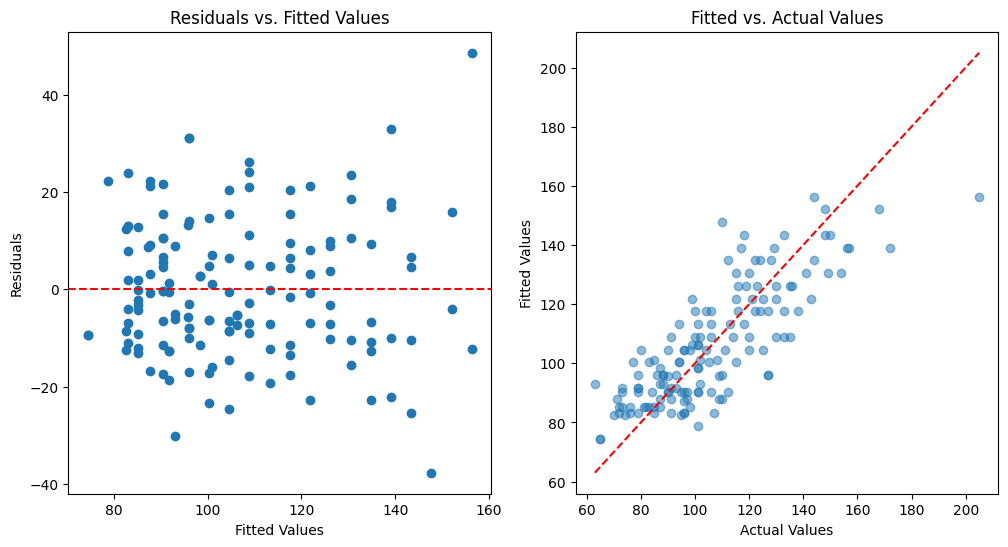

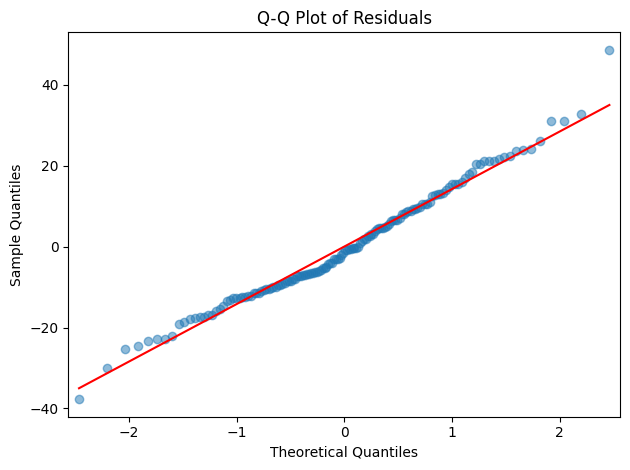

In [15]:
# Calculating fitted values and residuals for the interaction model
fitted_values_interaction = model_interaction.fittedvalues
residuals_interaction = model_interaction.resid

# Conducting residual analysis for the interaction model

# Calculate residuals
residuals_interaction = model_interaction.resid

# Plotting residuals to check for patterns
plt.figure(figsize=(12, 6))

# Residuals vs Fitted
plt.subplot(1, 2, 1)
plt.scatter(fitted_values_interaction, residuals_interaction)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')

# Actual values are in the 'MonthlyTransactions' column of the account_data DataFrame
actual_values_interaction = account_data['MonthlyTransactions']

# Plotting Fitted vs Actual
plt.subplot(1, 2, 2)
plt.scatter(actual_values_interaction, fitted_values_interaction, alpha=0.5)
plt.plot([actual_values_interaction.min(), actual_values_interaction.max()], [actual_values_interaction.min(), actual_values_interaction.max()], 'r--')  # Line for perfect fit
plt.xlabel('Actual Values')
plt.ylabel('Fitted Values')
plt.title('Fitted vs. Actual Values')

# Q-Q plot for residuals
plt.subplot(1, 2, 2)
sm.qqplot(residuals_interaction, line='s', alpha=0.5)
plt.title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()

**Residuals vs. "Fitted" Werte**  

- Ziel: Untersuchung auf Muster oder systematische Abweichungen, die auf Probleme mit dem Modell hinweisen könnten.
- Beobachtung: In einem idealen Szenario sollten die Residuals zufällig um die horizontale Linie bei 0 verteilt sein, ohne erkennbare Muster. Dies würde darauf hindeuten, dass das Modell die Variabilität der Daten gleichmässig über den gesamten Wertebereich erfasst.
- Interpretation: Wenn die Punkte im Plot eine zufällige Streuung ohne klare Muster oder systematische Abweichungen zeigen, deutet dies darauf hin, dass das Modell die Daten angemessen erfasst. Sollten jedoch Muster, wie eine Trichterform oder klare Abweichungen von der Linie, erkennbar sein, könnte dies auf Probleme wie Heteroskedastizität oder nicht-lineare Beziehungen hinweisen, die nicht vollständig vom Modell erfasst werden.

**Q-Q Plot der Residuals**  

- Ziel: Überprüfung der Normalverteilungsannahme der Residuals, welche für viele statistische Tests innerhalb der linearen Regression wichtig ist.
- Beobachtung: Der ideale Q-Q Plot zeigt, dass die Punkte der Residuals eng entlang der Referenzlinie liegen, was auf eine Übereinstimmung mit der Normalverteilung hinweist.
- Interpretation: Eine enge Anpassung der Punkte an die Linie im Q-Q Plot unterstützt die Annahme, dass die Residuals normalverteilt sind. Dies ist wichtig für die Gültigkeit von Signifikanztests und Konfidenzintervallen im linearen Regressionsmodell. Abweichungen, besonders in den Enden des Plots, können auf das Vorhandensein von Outliers oder eine "Skewness" in der Verteilung der Residuals hinweisen.

**Zusammenfassende Interpretation**  

Der Residuals vs. Angepasste Werte Plot und der Q-Q Plot bieten zusammen wertvolle Diagnoseinformationen über die Passung und Annahmen des Modells. Eine angemessene Streuung der Residuals und eine annähernde Übereinstimmung mit der Normalverteilung verstärken das Vertrauen in das Modell und seine Interpretationen.
Sollten bei diesen Diagnosetests Auffälligkeiten beobachtet werden, könnten weitere Anpassungen am Modell erforderlich sein, wie die Transformation der abhängigen Variable, die Berücksichtigung weiterer Variablen oder die Anwendung robusterer Modellierungsansätze.

In [16]:
# Displaying R-squared and Adjusted R-squared for the interaction model
r_squared_interaction = model_interaction.rsquared
adj_r_squared_interaction = model_interaction.rsquared_adj

(r_squared_interaction, adj_r_squared_interaction)

(0.6566329434116424, 0.6492750779133205)

# Nicht-Linearität

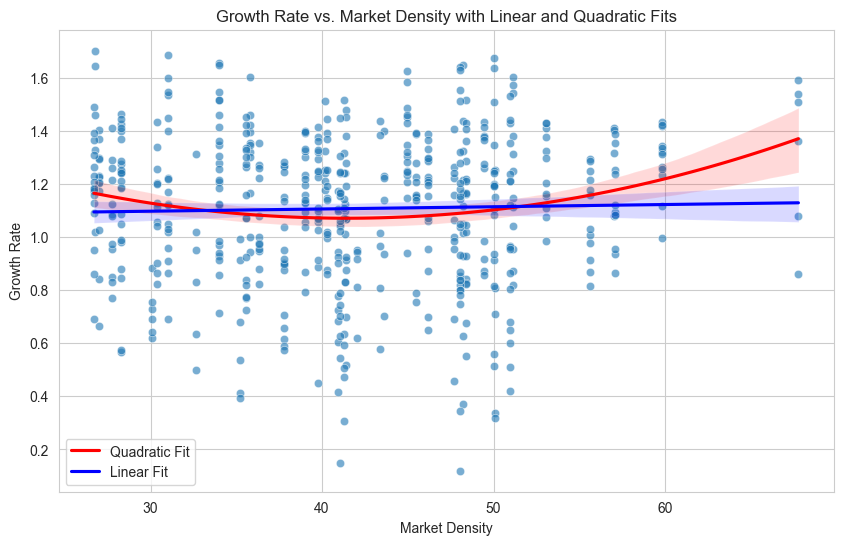

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the financial dataset
companies = pd.read_csv('CompanyGrowth.csv')

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plot GrowthRate against MarketDensity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=companies, x='MarketDensity', y='GrowthRate', alpha=0.6)
sns.regplot(data=companies, x='MarketDensity', y='GrowthRate', scatter=False, order=2, label='Quadratic Fit', color='red')
sns.regplot(data=companies, x='MarketDensity', y='GrowthRate', scatter=False, order=1, label='Linear Fit', color='blue')

plt.title('Growth Rate vs. Market Density with Linear and Quadratic Fits')
plt.xlabel('Market Density')
plt.ylabel('Growth Rate')
plt.legend()
plt.show()

/Users/tim/.pyenv/versions/3.11.2/envs/venv-hwz-cas-ml-finance/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


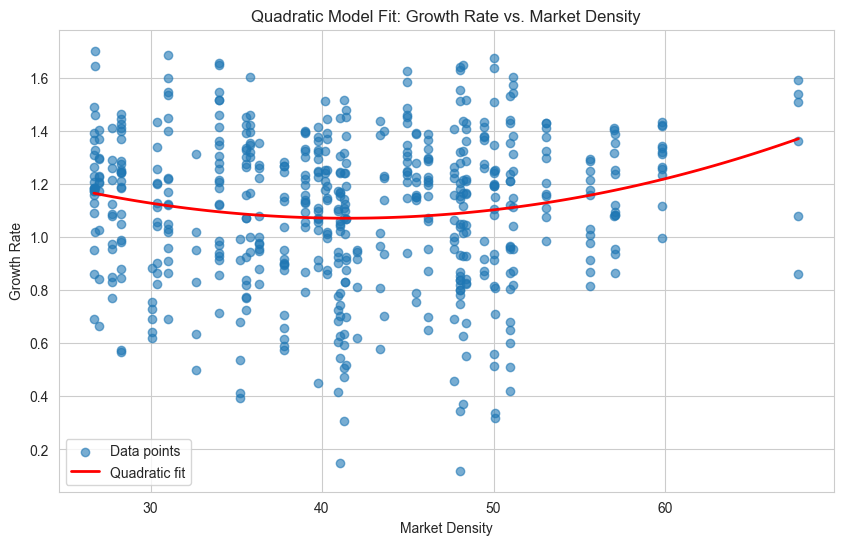

(0.07649435541388219, 0.025413287440039012)

In [18]:
# Prepare data for quadratic fit
X = companies[['MarketDensity']]
y = companies['GrowthRate']
poly = PolynomialFeatures(degree=2) # Here you adjust the degree of Polynomial
X_quad = poly.fit_transform(X)

# Fit the quadratic model
model_quad = LinearRegression()
model_quad.fit(X_quad, y)

# Predictions for plotting
X_fit = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_fit_quad = poly.transform(X_fit)
y_quad_fit = model_quad.predict(X_fit_quad)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.6, label='Data points')
plt.plot(X_fit, y_quad_fit, label='Quadratic fit', color='red', linewidth=2)
plt.title('Quadratic Model Fit: Growth Rate vs. Market Density')
plt.xlabel('Market Density')
plt.ylabel('Growth Rate')
plt.legend()
plt.show()

# Model evaluation
y_quad_pred = model_quad.predict(X_quad)
mse_quad = mean_squared_error(y, y_quad_pred)
r2_quad = r2_score(y, y_quad_pred)

(mse_quad, r2_quad)

Polynome scheinen eine flexible Lösung für die Modellierung nicht-linearer Beziehungen zu sein. Allerdings bringen sie wesentliche Nachteile mit sich, die ihren Nutzen in vielen Fällen begrenzen:

- Kollinearität (Datenpunkte auf einer geraden Linie): Polynome, insbesondere von höherem Grad, können stark kollinear sein, was zu Overfitting der Modelle führen kann.

- Zuverlässigkeit ausserhalb des Anpassungsbereichs: Polynome sind ausserhalb des Bereichs, in dem sie fitted wurden, oft nicht zuverlässig. Das bedeutet, dass Vorhersagen für Werte außerhalb des vorhandenen Datenbereichs oft ungenau und irreführend sind.

- Wahl des Grades: Es gibt keine einfache Regel, die bestimmt, welchen Grad ein Polynom haben sollte. Obwohl niedrigere Grade in einigen Beispielen ausreichend sein können, sind in der Realität oft höhere Grade notwendig, um komplexere nicht-lineare Beziehungen angemessen zu modellieren.

- Die Hauptprobleme bei der Verwendung von Polynomen liegen in der Balance zwischen Flexibilität und der Gefahr von Overfitting, sowie der Fähigkeit, genaue Extrapolationen zu machen. Höhergradige Polynome können zwar komplexe Muster innerhalb des Datensatzes erfassen, führen aber auch zu unzuverlässigen Vorhersagen außerhalb des Anpassungsbereichs und können eine Überanpassung verursachen.

Insgesamt zeigen diese Einschränkungen, dass Polynome zwar ein nützliches Werkzeug für die Modellierung bestimmter Typen von nicht-linearen Beziehungen sein können, sie aber nicht die beste Lösung für alle Arten von nicht-linearen Modellierungsproblemen darstellen. Alternativen wie Regressions-Splines oder Generalisierte Additive Modelle (GAMs) bieten oft bessere Eigenschaften in Bezug auf Zuverlässigkeit und Flexibilität ohne die genannten Probleme von Polynomen.

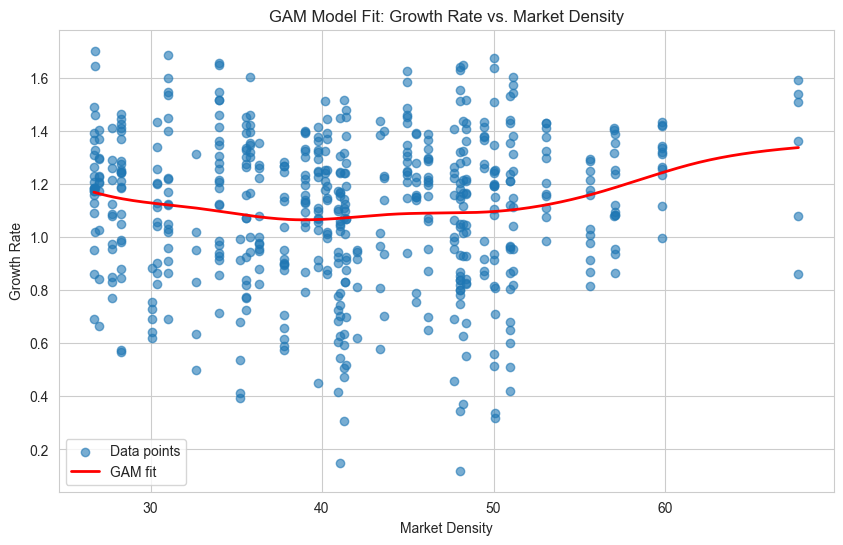

(0.07627135219019585, 0.028254490264572052)

In [19]:
from pygam import LinearGAM, s
from sklearn.metrics import mean_squared_error, r2_score

# Prepare data for GAM
X = companies[['MarketDensity']]
y = companies['GrowthRate']

# Create and fit the GAM model with a quadratic term for MarketDensity
gam = LinearGAM(s(0, n_splines=10)).fit(X, y)  # Adjust n_splines for flexibility

# Predictions for plotting
X_fit = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
y_fit = gam.predict(X_fit)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.6, label='Data points')
plt.plot(X_fit, y_fit, label='GAM fit', color='red', linewidth=2)
plt.title('GAM Model Fit: Growth Rate vs. Market Density')
plt.xlabel('Market Density')
plt.ylabel('Growth Rate')
plt.legend()
plt.show()

# Model evaluation
y_pred = gam.predict(X)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

(mse, r2)

In [14]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      6.5796
Link Function:                     IdentityLink Log Likelihood:                                 -2650.7319
Number of Samples:                          557 AIC:                                             5316.6229
                                                AICc:                                            5316.8601
                                                GCV:                                                0.0789
                                                Scale:                                              0.0772
                                                Pseudo R-Squared:                                   0.0283
Feature Function                  Lam

/var/folders/9k/tdnv785s1hx8x68mq3f94lzw0000gn/T/ipykernel_27178/3358381670.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


Link Function:

- Die Verteilung der Residuen wird als Normalverteilt angenommen, was bedeutet, dass die Residuen um Null zentriert sind und eine symmetrische Verteilung haben.
- Die Verknüpfungsfunktion ist die Identitätsfunktion, was bedeutet, dass die Vorhersagen direkt die Schätzungen der Antwortvariable sind, ohne eine Transformation zu durchlaufen.

Performance:

- Die Anzahl der effektiven Freiheitsgrade (EDoF) beträgt 6.5796, was die Flexibilität des Modells bei der Anpassung der Daten angibt. Ein höherer EDoF deutet auf ein flexibleres Modell hin.
- Das Log-Likelihood des Modells beträgt -2650.7319, was die Anpassung des Modells an die Daten misst. Ein höheres Log-Likelihood deutet auf eine bessere Anpassung hin.
- AIC (Akaike Information Criterion) und AICc (korrigiertes Akaike Information Criterion) werden verwendet, um die Modellkomplexität zu berücksichtigen und die Modellleistung zu bewerten. Ein niedrigerer Wert deutet auf ein besseres Modell hin.
- GCV (Generalized Cross Validation) ist eine Schätzung der erwarteten Vorhersagefehler des Modells. Ein niedrigerer Wert deutet auf eine bessere Modellleistung hin.
- Die Skalierung der Residuen beträgt 0,0772, was eine Maßnahme für die Varianz der Residuen ist.
- Das Pseudo R² beträgt 0.0283, was angibt, wie gut das Modell im Vergleich zum Nullmodell abschneidet. Ein höherer Wert deutet auf eine bessere Modellleistung hin.

Feature-Funktionen:

- Die Feature-Funktion s(0) ist eine glatte Funktion (Spline) für die erste Variable (vermutlich MarketDensity), mit einem Lambda-Wert von 0,6. Ein Lambda-Wert von 0,6 zeigt an, wie stark die Glättung des Spline-Effekts ist. Ein niedrigerer Lambda-Wert würde zu einer stärkeren Glättung führen.
- Die Feature-Funktion intercept ist der Achsenabschnitt des Modells.

Signifikanz der Terme:

Die Tabelle zeigt die Signifikanz der einzelnen Terme im Modell. Die P-Werte (P > x) zeigen an, ob die Terme statistisch signifikant sind.